<a href="https://colab.research.google.com/github/Shankar-Cherla/ML-Udacity-Projects/blob/master/Zodiac_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install -q kaggle

In [2]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [4]:
!kaggle datasets download -d elderyouth/chinese-zodiac-signs

100% 2.06G/2.07G [00:25<00:00, 27.6MB/s]
100% 2.07G/2.07G [00:25<00:00, 86.6MB/s]


In [5]:
!unzip *.zip

Archive:  chinese-zodiac-signs.zip
  inflating: signs/test/dog/00000004.jpg  
  inflating: signs/test/dog/00000005.jpg  
  inflating: signs/test/dog/00000010.jpg  
  inflating: signs/test/dog/00000011.jpg  
  inflating: signs/test/dog/00000038.jpg  
  inflating: signs/test/dog/00000039.jpg  
  inflating: signs/test/dog/00000144.jpeg  
  inflating: signs/test/dog/00000164.jpg  
  inflating: signs/test/dog/00000165.jpg  
  inflating: signs/test/dog/00000167.jpg  
  inflating: signs/test/dog/00000170.jpg  
  inflating: signs/test/dog/00000173.jpg  
  inflating: signs/test/dog/00000206.jpg  
  inflating: signs/test/dog/00000207.jpg  
  inflating: signs/test/dog/00000212.jpg  
  inflating: signs/test/dog/00000213.jpg  
  inflating: signs/test/dog/00000359.jpg  
  inflating: signs/test/dog/00000365.jpg  
  inflating: signs/test/dog/00000366.jpg  
  inflating: signs/test/dog/00000371.jpg  
  inflating: signs/test/dog/00000372.jpg  
  inflating: signs/test/dog/00000373.jpg  
  inflating: signs

In [6]:
!ls signs

test  train  valid


In [7]:
!pip install nonechucks

  Created wheel for nonechucks: filename=nonechucks-0.4.0-cp36-none-any.whl size=11546 sha256=2f77c7089bbed82c712be22a0808050b6dae54690531f8e90a73ec67388f6e48
  Stored in directory: /root/.cache/pip/wheels/00/b3/4e/4e30d5f934293de9abab2bfe6a4ce6fe77bf936c625133dd9c
Successfully built nonechucks


In [1]:
import torch
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import nonechucks as nc

train_transform = transforms.Compose([transforms.RandomResizedCrop(256),
                                      transforms.RandomRotation(15),
                                      transforms.RandomHorizontalFlip(),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],
                                                           [0.229, 0.224, 0.225])])

valid_test_transform = transforms.Compose([transforms.Resize(256),
                                     transforms.CenterCrop(244),
                                     transforms.ToTensor(),
                                     transforms.Normalize([0.485, 0.456, 0.406],
                                                          [0.229, 0.224, 0.225])])

train_path = 'signs/train'
test_path = 'signs/test'
valid_path = 'signs/valid'

train_dataset = datasets.ImageFolder(train_path, transform = train_transform)
train_dataset = nc.SafeDataset(train_dataset)

validation_dataset = datasets.ImageFolder(valid_path, transform = valid_test_transform)
validation_dataset = nc.SafeDataset(validation_dataset)

test_dataset = datasets.ImageFolder(test_path, transform = valid_test_transform)
test_dataset = nc.SafeDataset(test_dataset)

train_loader = torch.utils.data.DataLoader( train_dataset, batch_size = 64, shuffle = True)
test_loader = torch.utils.data.DataLoader( test_dataset, batch_size = 64, shuffle = True)
validation_loader = torch.utils.data.DataLoader( validation_dataset, batch_size = 64, shuffle = True)


nonechucks may not work properly with this version of PyTorch (1.3.1). It has only been tested on PyTorch versions 1.0, 1.1, and 1.2


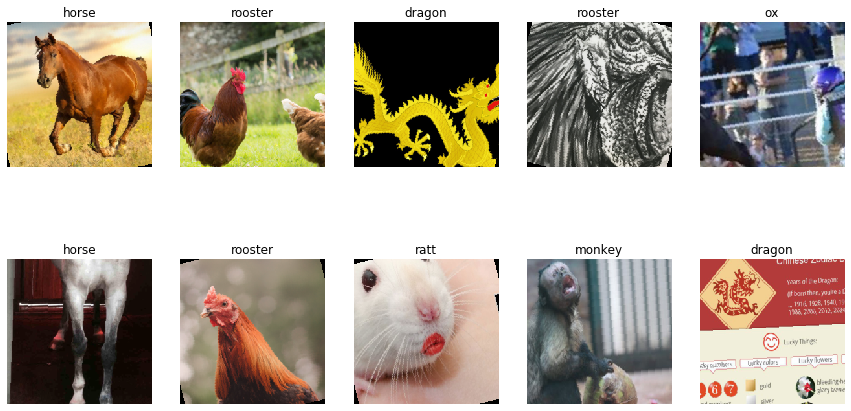

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def imageplot(img):
  img = img.numpy().transpose((1, 2, 0))
  mean, std = [0.485, 0.456, 0.406], [0.229, 0.224, 0.225]
  img = img*std + mean
  img = np.clip(img, 0, 1)
  plt.imshow(img)

dataiter = iter(train_loader)
images, labels = dataiter.next()

class_names = ['dog', 'dragon', 'goat', 'horse', 'monkey', 'ox', 'pig', 'rabbit', 'ratt', 'rooster', 'snake', 'tiger']

#plotting 10 images
fig = plt.figure(figsize = (15, 8))
for i in range(10):
  ax = fig.add_subplot(2 , 5, i+1)
  imageplot(images[i])
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.spines['left'].set_visible(False)
  ax.spines['bottom'].set_visible(False)
  ax.tick_params(axis='both', length=0)
  ax.set_xticklabels('')
  ax.set_yticklabels('')
  ax.set_title(class_names[labels[i]])   


In [3]:
import torchvision.models as models

model = models.mobilenet_v2(pretrained = True)
#resnext50_32x4d and inception_v3 and wide_resnet50_2 and mnasnet1_0
print(model)

MobileNetV2(
  (features): Sequential(
    (0): ConvBNReLU(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNReLU(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNReLU(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=Tr

In [0]:
for param in model.parameters():
  param.requires_grad = False

In [5]:
from collections import OrderedDict
import torch.nn as nn

fc = nn.Sequential(OrderedDict({
    'fc1': nn.Linear(1280, 12),
    'final_activation': nn.LogSoftmax(dim = 1)
}))

model.classifier = fc
print(model)

MobileNetV2(
  (features): Sequential(
    (0): ConvBNReLU(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNReLU(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNReLU(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=Tr

In [0]:
import torch.optim as optim
criterion = nn.NLLLoss()
optimiser = optim.Adam(model.classifier.parameters(), lr=0.001)


In [7]:
model.to('cuda')

MobileNetV2(
  (features): Sequential(
    (0): ConvBNReLU(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNReLU(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): ConvBNReLU(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=Tr

In [8]:
#train and validation
import numpy as np

train_loss_list = list()
validation_loss_list = list()
validationloss_min = np.Inf
epochs = 25

for epoch in range(epochs):
  running_train_loss = 0
  model.train()
  for images, labels in train_loader:
    images, labels = images.to('cuda'), labels.to('cuda')
    optimiser.zero_grad()
    logits = model(images)
    loss = criterion(logits, labels)
    running_train_loss += loss.item()
    loss.backward()
    optimiser.step()
  else:
    avg_train_loss = running_train_loss/(len(train_loader))
    train_loss_list.append(avg_train_loss)

  running_validation_loss = 0
  accuracy = 0
  model.eval()
  with torch.no_grad():
    for images, labels in validation_loader:
      images, labels = images.to('cuda'), labels.to('cuda')
      logits = model(images)
      loss = criterion(logits, labels)
      running_validation_loss += loss.item()
      ps = torch.exp(logits)
      top_prob, top_class = ps.topk(1, dim =1)
      equals = labels.eq(top_class.reshape(*labels.shape))
      accuracy += torch.mean(equals.type(torch.FloatTensor))
    else:
      avg_validation_loss = running_validation_loss/(len(validation_loader))
      if avg_validation_loss < validationloss_min:
        validationloss_min = avg_validation_loss
        #problem is here!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
        torch.save(model.state_dict(), 'zodiac_challenge.pth')
      validation_loss_list.append(avg_validation_loss)
  
  print(f"For the epoch {epoch+1}/{epochs}",
        f"Training loss is {avg_train_loss}",
        f"Validation loss is {avg_validation_loss}",
        f"Validation accuracy is {(accuracy/(len(validation_loader))*100)}")

    
    

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


For the epoch 1/25 Training loss is 1.065398919371377 Validation loss is 0.492114546624097 Validation accuracy is 87.30113220214844
For the epoch 2/25 Training loss is 0.6425601196500053 Validation loss is 0.38970818573778326 Validation accuracy is 88.72158813476562
For the epoch 3/25 Training loss is 0.5704221023922473 Validation loss is 0.3382805450396104 Validation accuracy is 90.48295593261719
For the epoch 4/25 Training loss is 0.5333284954581641 Validation loss is 0.3095534470948306 Validation accuracy is 91.3352279663086
For the epoch 5/25 Training loss is 0.501192737469631 Validation loss is 0.3046382042494687 Validation accuracy is 90.48295593261719
For the epoch 6/25 Training loss is 0.47310865769344096 Validation loss is 0.3032070208679546 Validation accuracy is 91.07954406738281
For the epoch 7/25 Training loss is 0.4588686148677252 Validation loss is 0.3261685628782619 Validation accuracy is 88.125
For the epoch 8/25 Training loss is 0.4475420220235808 Validation loss is 0

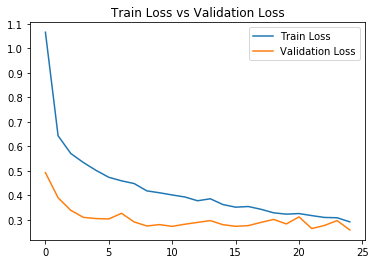

In [9]:

plt.plot(train_loss_list, label = 'Train Loss')
plt.plot(validation_loss_list, label = 'Validation Loss')
plt.title("Train Loss vs Validation Loss")
plt.legend(loc="upper right")
plt.show()

Overall Average test accuracy is 88.125%

Test Accuracy of dog is 92.72727272727273% (51/55)
Test Accuracy of dragon is 80.0% (44/55)
Test Accuracy of goat is 74.54545454545455% (41/55)
Test Accuracy of horse is 92.72727272727273% (51/55)
Test Accuracy of monkey is 92.72727272727273% (51/55)
Test Accuracy of ox is 87.27272727272727% (48/55)
Test Accuracy of pig is 92.72727272727273% (51/55)
Test Accuracy of rabbit is 92.72727272727273% (51/55)
Test Accuracy of ratt is 87.27272727272727% (48/55)
Test Accuracy of rooster is 89.0909090909091% (49/55)
Test Accuracy of snake is 89.0909090909091% (49/55)
Test Accuracy of tiger is 89.0909090909091% (49/55)


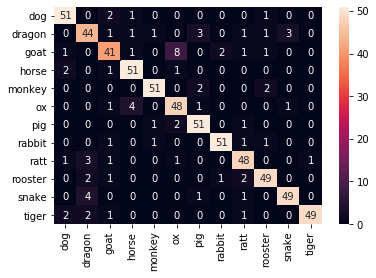

In [11]:
import seaborn as sns

model.load_state_dict(torch.load('zodiac_challenge.pth'))
model.eval()
test_accuracy = 0
confusionMatrix = np.zeros((12,12))
item_list = list()

for images, labels in test_loader:
  images, labels = images.cuda(), labels.cuda()
  with torch.no_grad():
    logits = model(images)
    ps = torch.exp(logits)
    top_prob, top_class = ps.topk(1, dim = 1)
    equals = top_class.eq(labels.view(*top_class.shape))
    test_accuracy += torch.mean(equals.type(torch.FloatTensor))
    a = zip(labels.cpu().numpy(), top_class.cpu().numpy().flatten())
    for item in a:
      item_list.append(item)

else:
  test_accuracy = test_accuracy/(len(test_loader))
  print(f"Overall Average test accuracy is {test_accuracy*100}%\n")
  for item in item_list:
    i, j = item
    confusionMatrix[i, j] = confusionMatrix[i, j] + 1
  #print(confusionMatrix)
  sums_array = np.sum(confusionMatrix, 1)
  for i in range(12):
    print(f"Test Accuracy of {class_names[i]} is {(confusionMatrix[i,i])*100/(sums_array[i])}% ({int(confusionMatrix[i, i])}/55)")
  sns.heatmap(confusionMatrix, xticklabels = class_names, yticklabels = class_names, annot = True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


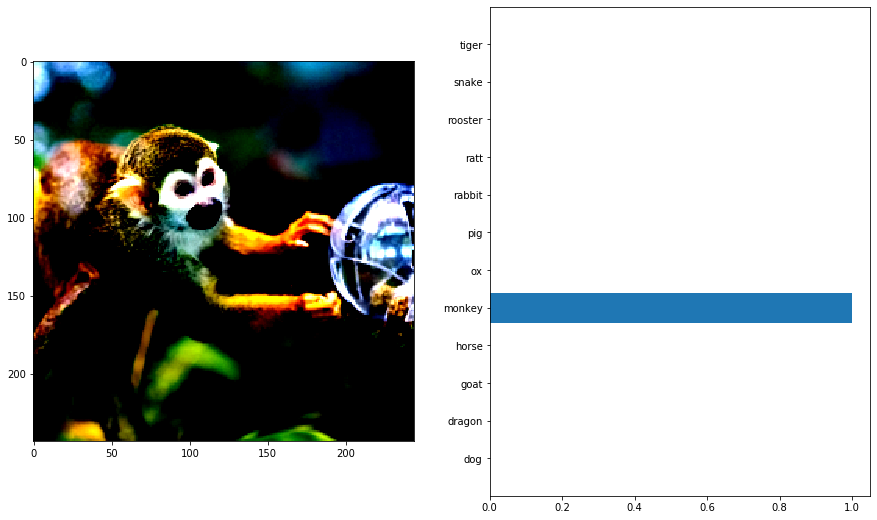

In [12]:
iterator = iter(test_loader)
images, labels = iterator.next()

images, labels = images.cuda(), labels.cuda()
logits = model(images)
ps = torch.exp(logits)

plt.figure(figsize = (15,9))
plt.subplot(121)
plt.imshow(np.transpose(images[0].cpu().numpy(), (1,2,0)))
plt.subplot(122)
plt.barh(np.arange(12), ps[0].cpu().detach().numpy(), tick_label = class_names)
plt.show()
